In [163]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
import matplotlib.pyplot as plt


%matplotlib inline

In [164]:
for i in range(1,4):
    data = pd.read_csv('runsummary%d.csv' %(i))
    feature_names = np.array(['roll','roll_rate'])
    results = pd.DataFrame(print(data.head()))

   Roll_Angle  Roll_Rate  Total_Error
0   -0.728638   0.296875          0.0
1   -0.729797   0.265625        -74.5
2   -0.732635   0.234375        -74.0
3   -0.735413   0.289062        -74.0
4   -0.735352   0.289062        -73.5
   Roll_Angle  Roll_Rate  Total_Error
0    3.756531   0.734375          0.0
1    3.788879   1.335938          0.0
2    3.828796   1.054688        -28.0
3    3.848145   0.195312        -28.0
4    3.832428  -0.531250        -28.0
   Roll_Angle  Roll_Rate  Total_Error
0   -2.287170  -0.703125          0.0
1   -2.334137  -0.937500          0.0
2   -2.368134  -0.257812          0.0
3   -2.392761  -0.539062          0.0
4   -2.409424   0.234375          0.0


In [165]:
type(feature_names)

numpy.ndarray

In [166]:
type(data)

pandas.core.frame.DataFrame

In [167]:
feature_names

array(['roll', 'roll_rate'], dtype='<U9')

In [168]:
data.head()

,Roll_Angle,Roll_Rate,Total_Error
0,-2.287170,-0.703125,0.0
1,-2.334137,-0.937500,0.0
2,-2.368134,-0.257812,0.0
3,-2.392761,-0.539062,0.0
4,-2.409424,0.234375,0.0


In [169]:
data.shape

(1726, 3)

In [170]:
data.describe()

,Roll_Angle,Roll_Rate,Total_Error
count,1726.000000,1726.000000,1726.000000
mean,-2.361235,0.254160,21.875145
std,1.206092,1.362938,55.069994
min,-4.791840,-4.507812,-162.500000
25%,-3.321068,-0.640625,-16.000000
50%,-2.311279,0.246094,23.500000
75%,-1.421646,1.171875,58.000000
max,0.057983,5.132812,178.000000


In [171]:
from sklearn.model_selection import train_test_split


Y = data['Total_Error']
print(Y.shape)
X = data.iloc[:, 0:2].values
print(X.shape)

(1726,)
(1726, 2)


In [172]:
Y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6        39.0
7        39.0
8        39.0
9        51.0
10       71.0
11       72.5
12       72.5
13      118.5
14      118.5
15      119.5
16      123.5
17      122.0
18      122.5
19       97.5
20       97.5
21      109.5
22      105.0
23       91.5
24       84.5
25       66.5
26       59.0
27       58.5
28       58.5
29       58.5
        ...  
1696   -119.0
1697   -141.5
1698   -162.5
1699   -162.5
1700   -161.0
1701   -130.0
1702   -116.0
1703    -94.5
1704    -90.5
1705    -75.5
1706    -31.0
1707      1.0
1708     19.5
1709     30.5
1710     37.5
1711     35.0
1712     35.0
1713     35.0
1714     42.5
1715     40.0
1716     18.0
1717     21.0
1718     17.5
1719     14.5
1720     -8.5
1721    -17.0
1722    -41.0
1723    -53.5
1724    -54.5
1725    -54.5
Name: Total_Error, Length: 1726, dtype: float64

In [173]:
X

array([[-2.28717041, -0.703125  ],
       [-2.33413696, -0.9375    ],
       [-2.36813354, -0.2578125 ],
       ...,
       [-3.38067627,  0.328125  ],
       [-3.3454895 ,  0.9921875 ],
       [-3.32110596,  2.53125   ]])

In [174]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [175]:
print(X_train.shape,Y_train.shape)

(1294, 2) (1294,)


In [176]:
reg = ske.RandomForestRegressor(n_estimators=1000,random_state = 0)

In [177]:
Y_train.shape

(1294,)

In [178]:
Y_train = np.ravel(Y_train)

In [179]:
reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [180]:
Y_pred = reg.predict(X_test)

In [181]:
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error,mean_squared_error,r2_score

In [182]:
explained_variance_score(Y_test,Y_pred)

-0.07046273340440612

In [183]:
max_error(Y_test,Y_pred)

199.0025

In [184]:
print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(r2_score(Y_test, Y_pred, multioutput='variance_weighted'))

44.62836458333333
3148.06071670081
-0.07214736837178637


In [207]:
reg.feature_importances_

array([0.56829495, 0.43170505])

In [190]:
feat_ind = np.argsort(reg.feature_importances_)[::-1]
feat_ind

array([0, 1], dtype=int64)

In [208]:
feat_imp = reg.feature_importances_[np.argsort(reg.feature_importances_)][::-1]
feat_imp

array([0.56829495, 0.43170505])

In [194]:
feature_names[feat_ind]

array(['roll', 'roll_rate'], dtype='<U9')

Text(0.5, 1.0, 'Feature Importance')

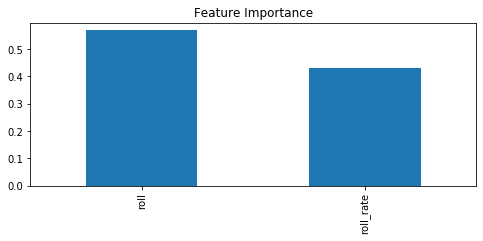

In [189]:
fig,ax=plt.subplots(1,1,figsize = (8,3))
labels = feature_names[feat_ind]
pd.Series(feat_imp,index = labels).plot('bar',ax = ax)
ax.set_title('Feature Importance')

In [158]:
from sklearn import tree
reg.estimators_[0]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=209652396, splitter='best')

In [159]:
tree.export_graphviz(reg.estimators_[0], 'tree.dot')
tree.export_graphviz(reg.estimators_[5], 'tree.dot', feature_names = feature_names, rounded = True, precision = 1)

In [162]:
reg.feature_importances_[0]

0.5682949540178486

In [205]:
featimportance = pd.DataFrame(feature_names, columns = ['Feature'])
featimportance

,Feature
0,roll
1,roll_rate


In [206]:
featimportance['Feature Importance']=feat_imp
featimportance

,Feature,Feature Importance
0,roll,0.568295
1,roll_rate,0.431705
